### Using Weights from a Keras Trained Model to do Inference using Pure Numpy


In [1]:
import os, re
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
import json

import np_inference
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

8


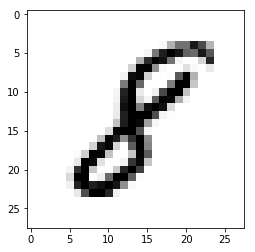

In [4]:
plt.imshow(x_train[7777], cmap='Greys')
print(y_train[7777]) 

In [5]:
# reshpae and normallize for plain NN
# change the y_train/test to binary (Even = 1, Odd = 0)
x_train_1 = x_train.reshape(x_train.shape[0], -1).astype(np.float32)/255
x_test_1 = x_test.reshape(x_test.shape[0], -1).astype(np.float32)/255

y_test_1 = (y_test % 2 == 0).astype(np.uint8)
y_train_1 = (y_train % 2 == 0).astype(np.uint8)


print(x_train_1.shape, x_test_1.shape, x_train_1.dtype, x_test_1.dtype)
print(y_train_1.shape, y_train_1.dtype, y_test_1.shape, y_test_1.dtype)

(60000, 784) (10000, 784) float32 float32
(60000,) uint8 (10000,) uint8


In [ ]:
plt.imshow(x_train_1[7778].reshape(28, 28), cmap='Greys')
print(y_train_1[7778]) 

In [ ]:
# Train a model

model = Sequential()

# L1
model.add(Dense(units=256, activation='relu', input_shape=x_train_1.shape[1:]))
model.add(Dropout(.4))

# L2
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.4))

#L3 - Output
model.add(Dense(units=1, activation='sigmoid'))

model.summary()


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(x=x_train_1, y=y_train_1, validation_data=(x_test_1, y_test_1), epochs=10)

In [ ]:
model.evaluate(x_test_1, y_test_1)

In [ ]:
image_index = 7774
plt.imshow(x_test_1[image_index].reshape(28,28), cmap='Greys')
pred = int(model.predict(x_test_1[image_index].reshape(1,-1)) > .5)
act = y_test_1[image_index]
print(act, pred)

1 1.0


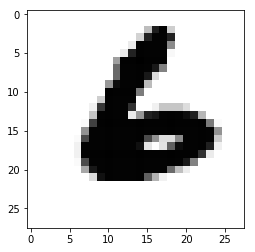

In [8]:
weights = np_inference.load_weights('weights.npy')
image_index = 7778
plt.imshow(x_test_1[image_index].reshape(28,28), cmap='Greys')
#pred_keras = model.predict(x_test_1[image_index].reshape(1,-1))[0][0]
pred_np = np_inference.predict_np(x_test_1[image_index], weights)
act = y_test_1[image_index]
print(act, pred_np)


In [ ]:
X1.shape